# Assignment 5

                                All the work herein is solely mine
                                
                                
                                                          Submitted by: Madhavan Kalkunte Ramachandra (madhkr)
                                                          
                                                          
                                                               Partner: Manasi Swaminathan (mswamina) 

# Problem 1

## Problem 1.1: The brute-force pattern-matching algorithm

Describe a text D and a pattern P such that the brute-force pattern-matching algorithm runs in Ω(dp) time.The lengths of D and P are d and p, respectively.


## Solution 1.1:

**Big-Omega (Ω) notation** gives a lower bound for a function f(n) to within a constant factor.

We write f(n) = Ω(g(n)), If there are positive constants n0 and c such that, to the right of n0 the f(n) always lies on or above c*g(n).

So, in our case, we have to find an input text D and pattern P such that brute force algorithm runs at Ω(dp) where d and p are lengths of text and pattern respectively.

For example, if our text has 10 characters and pattern has 2 characters, then our choice of text must be such that the algorithm does atleast 20 comparisons. 

In brute force algorithm the number of comparisons is dependent on the first mismatch we encouter between the text and pattern. So if we have to maximize the number of comparisons, then the mismatch between the text and at a must be as far ahead in the pattern as possible. i.e if the mismatch exists in the end of pattern, highest number of comparisons ( = length of pattern) will have occured.

Another factor that impacts the number of comparisons is the length of the pattern. We know that the worst case comparisons that can happen is (d-p+1)* p. Our aim is to maximize this comparison so that it is atleast (d * p)

i.e (d-p+1)* p >= (d)* p
=>  (d-p+1) >= d
=>  p <= 1

That is if our pattern is lesser than or equal to 1 then we will do atleast (d * p) comparisons. And since pattern length has to be atleast 1 (0 length pattern is a trivial case i.e it exists in every text). Further, we have two choices for pattern of length 1:
1) A single character that exists in the text: In this case we may get a pattern match before we have done **dp** number of comparisons. Hence it is not the ideal choice.
2) A single character that does not exist in the text: In this case we are guarenteed to compare with every character from the text. Since p=1 and we compare with every character from D, we will be doing **dp=d * 1 = d** comparisons.

**Conclusion: Therefore, if we have to run the brute-force algorithm in Ω(dp) time, then we have to choose a pattern of length 1 such that the pattern is non-existent in the text. **

*we can observe the above conclusion in the following code:*



In [1]:
# Brute force
def find_brute(T, P):
    n, m = len(T), len(P)
    # every starting position
    comparison = 0
    for i in range(n - m + 1):
        k = 0
        while k < m:
            comparison += 1
            if T[i + k] != P[k]:
                break
            k = k + 1
        if k == m:
            print('pattern found')
            return comparison
    return comparison


if __name__ == '__main__':
    input = 'AAAAAAAAAAAAAAAAAB'
    pattern = 'V'
    print('input.size - d = ', len(input))
    print('pattern.size - p = ', len(pattern))
    print("number of comparisons = ", find_brute(input, pattern), "= d*p =", len(input)*len(pattern))

input.size - d =  18
pattern.size - p =  1
number of comparisons =  18 = d*p = 18


## Problem 1.2 

In this part, you are asked to modify three pattern matching programs given to you (See appendix). Run your modified programs for varying-length patterns and show your results. The count method in Python’s str class takes a text D and a pattern P and returns the maximum number of non-overlapping occurrences of a P within D. As an example ‘cdcdcdcdc’.count(‘cdc’) returns 2.
1. Modify the brute-force pattern-matching to return non-overlapping occurrences of a P within D.
2. Similar to the previous question (Problem 1.2.1), do the same on the Boyer-Moore program.
3. Similar to problem 1.2.1, modify the KMP program.

## Approach

### Code modification:

All the 3 algorithms - brute force, boyer moore and KNP algorithm were modified to capture the count of non-overlapping occurences of a given pattern in a text. Following were the changes made in each algorithm.

1) Brute-Force:

    1) return type changed from index number of first occurance to number of times pattern has occured.
    
    2) Instead of returning once a match has occured, the text pointer is updated to the next index of the current pattern match.
    
    3) search continues even after a match is found until we have exhausted the text string.
    

2) Boyer-Moore:

    1) return type changed from index number of first occurance to number of times pattern has occured.
    
    2) Instead of returning once a match has occured, the text pointer is updated by 1 to point to the next index after the previous pattern occurence in text.
    
    3) search continues even after a match is found until we have exhausted the text string.
    
    
3) KNP:

    1) return type changed from index number of first occurance to number of times pattern has occured.
    
    2) Instead of returning once a match has occured, the pattern pointer is updated to the previous index indicated by fail[k-1].
    
    3) search continues even after a match is found until we have exhausted the text string.
    

### Input

1) A random input string of length 500 is generated from the alphabet ['a', 'b', 'c', 'd']

2) Two sets of patterns (each having 5 patterns) are dervied. First set of patterns are smaller patters with length in range 1 to 5. Second set of patterns are longer patterns with range 25 to 150.


### Experiment
For each of the algorithm following experiment is conducted:
1) For each pattern in the patterns list (short patterns) find the number of non-overlapping occurences in the input string using our algorithm.

2) For the same pattern and input string, use the python's inbuilt str.count method to find the number of non-overlapping occurences.

3) Report both the values and compare if they are the same.

The above experiment is then repeated for the longer patterns as well.

### Results
1) Results from our algorithm and python's str.count method match with 100% accuracy. 

2) We can observe large counts for smaller pattern. However as the pattern size increase, the number of occurances reduce and very soon becomes 1 (since we have derived the pattern from our input string, atleast one occurance is gauranteed.).

3) This tells us that the longer the pattern is, less likely it is find it in the text, even less likely to find multiple occurances of the same pattern.


In [2]:
import random

random.seed(2)

alphabet = ['a', 'b', 'c', 'd']
input_char_list = [random.choice(alphabet) for i in range(500)]
input_str = ''.join([str(elem) for elem in input_char_list])
pattern_lengths = [1, 2, 3, 4, 5]
long_pattern_lengths = [25, 50, 75, 100, 125]
random_indexes = random.sample([i for i in range(250)], len(pattern_lengths))
patterns = [input_str[random_indexes[i]: random_indexes[i]+pattern_lengths[i]] for i in range(len(pattern_lengths))]

long_random_indexes = random.sample([i for i in range(250)], len(long_pattern_lengths))
long_patterns = [input_str[long_random_indexes[i]: long_random_indexes[i]+long_pattern_lengths[i]] for i in range(len(long_pattern_lengths))]

In [3]:
import random

# Brute force
def modified_find_brute(T, P):
    n, m = len(T), len(P)
    # every starting position
    occurances = 0
    i = 0
    while i < (n-m+1):
        k=0
        while k < m:
            if T[i + k] != P[k]:
                break
            k = k + 1
        if k==m:
            occurances += 1
            i += m
        else:
            i+=1
    return occurances

print("occurances for shorter pattern lengths: ", pattern_lengths)
for pattern in patterns:
    print("non overlapping occurances brute force: {} and str.count: {} ".format(modified_find_brute(input_str, pattern), str.count(input_str, pattern)))

print("occurances for longer pattern lengths: ", long_pattern_lengths)
for long_pattern in long_patterns:
        print("non overlapping occurances brute force: {} and str.count: {} ".format(modified_find_brute(input_str, long_pattern), str.count(input_str, long_pattern)))

occurances for shorter pattern lengths:  [1, 2, 3, 4, 5]
non overlapping occurances brute force: 132 and str.count: 132 
non overlapping occurances brute force: 27 and str.count: 27 
non overlapping occurances brute force: 7 and str.count: 7 
non overlapping occurances brute force: 4 and str.count: 4 
non overlapping occurances brute force: 2 and str.count: 2 
occurances for longer pattern lengths:  [25, 50, 75, 100, 125]
non overlapping occurances brute force: 1 and str.count: 1 
non overlapping occurances brute force: 1 and str.count: 1 
non overlapping occurances brute force: 1 and str.count: 1 
non overlapping occurances brute force: 1 and str.count: 1 
non overlapping occurances brute force: 1 and str.count: 1 


In [4]:
# Boyer - Moore
def modified_find_boyer_moore (T , P ) :
    n , m = len ( T ) , len ( P )
    if m == 0:
        return 0
    last = {}
    for k in range ( m ) :
        last [ P [ k ]] = k
    i = m -1
    k = m -1
    occurances = 0
    while i < n :

        if T [i] == P[k]:
            if k == 0:
                occurances += 1
                i += 1
            else:
                i -= 1
                k -= 1
        # Not match , reset the positions
        else:
            j = last.get (T[i],-1)
            i += m - min (k,j+1)
            k = m - 1
    return occurances

print("occurances for shorter pattern lengths: ", pattern_lengths)
for pattern in patterns:
    print("non overlapping occurances boyer moore: {} and str.count: {} ".format(modified_find_boyer_moore(input_str, pattern), str.count(input_str, pattern)))

print("occurances for longer pattern lengths: ", long_pattern_lengths)
for long_pattern in long_patterns:
        print("non overlapping occurances boyer moore: {} and str.count: {} ".format(modified_find_boyer_moore(input_str, long_pattern), str.count(input_str, long_pattern)))

occurances for shorter pattern lengths:  [1, 2, 3, 4, 5]
non overlapping occurances boyer moore: 132 and str.count: 132 
non overlapping occurances boyer moore: 27 and str.count: 27 
non overlapping occurances boyer moore: 7 and str.count: 7 
non overlapping occurances boyer moore: 4 and str.count: 4 
non overlapping occurances boyer moore: 2 and str.count: 2 
occurances for longer pattern lengths:  [25, 50, 75, 100, 125]
non overlapping occurances boyer moore: 1 and str.count: 1 
non overlapping occurances boyer moore: 1 and str.count: 1 
non overlapping occurances boyer moore: 1 and str.count: 1 
non overlapping occurances boyer moore: 1 and str.count: 1 
non overlapping occurances boyer moore: 1 and str.count: 1 


In [5]:
# KMP failure function
def compute_kmp_fail ( P ) :
    m = len ( P )
    fail = [0] * m
    j = 1
    k = 0
    while j < m :
        if P [ j ] == P [ k ]:
            fail [ j ] = k +1
            j += 1
            k += 1
        elif k > 0:
            k = fail [k -1]
        else :
            j += 1
    return fail

# KMP
def modified_find_kmp (T , P ) :
    n , m = len ( T ) , len ( P )
    if m == 0:
        return 0
    fail = compute_kmp_fail ( P )
    # print ( fail )
    j = 0
    k = 0
    occurances=0
    while j < n :
        if T[j] == P[k]:
            j += 1
            k += 1
            if k == m :
                occurances+=1
                k = fail[k-1]
        elif k > 0:
            k = fail [k -1]
        else :
            j += 1
    return occurances

print("occurances for shorter pattern lengths: ", pattern_lengths)
for pattern in patterns:
    print("non overlapping occurances knp: {} and str.count: {} ".format(modified_find_kmp(input_str, pattern), str.count(input_str, pattern)))

print("occurances for longer pattern lengths: ", long_pattern_lengths)
for long_pattern in long_patterns:
        print("non overlapping occurances knp: {} and str.count: {} ".format(modified_find_kmp(input_str, long_pattern), str.count(input_str, long_pattern)))

occurances for shorter pattern lengths:  [1, 2, 3, 4, 5]
non overlapping occurances knp: 132 and str.count: 132 
non overlapping occurances knp: 27 and str.count: 27 
non overlapping occurances knp: 7 and str.count: 7 
non overlapping occurances knp: 4 and str.count: 4 
non overlapping occurances knp: 2 and str.count: 2 
occurances for longer pattern lengths:  [25, 50, 75, 100, 125]
non overlapping occurances knp: 1 and str.count: 1 
non overlapping occurances knp: 1 and str.count: 1 
non overlapping occurances knp: 1 and str.count: 1 
non overlapping occurances knp: 1 and str.count: 1 
non overlapping occurances knp: 1 and str.count: 1 


# Problem 2

In [12]:
import random

# Brute force
def v1_find_brute(T, P):
    n, m = len(T), len(P)
    # every starting position
    char_comps = 0
    i = 0
    while i < (n-m+1):
        k=0
        while k < m:
            char_comps += 1
            if T[i + k] != P[k]:
                break
            k = k + 1
        if k==m:
            break
        else:
            i+=1
    return char_comps


# Boyer - Moore
def v1_find_boyer_moore (T , P ) :
    n , m = len ( T ) , len ( P )
    if m == 0:
        return 0
    last = {}
    for k in range ( m ) :
        last [ P [ k ]] = k
    i = m -1
    k = m -1
    char_comps = 0
    while i < n :
        char_comps += 1
        if T [i] == P[k]:
            if k == 0:
                return char_comps
                i += 1
            else:
                i -= 1
                k -= 1
        # Not match , reset the positions
        else:
            j = last.get (T[i],-1)
            i += m - min (k,j+1)
            k = m - 1
    return char_comps


# KMP failure function
def v1_compute_kmp_fail ( P ) :
    m = len ( P )
    fail = [0] * m
    j = 1
    k = 0
    while j < m :
        if P [ j ] == P [ k ]:
            fail [ j ] = k +1
            j += 1
            k += 1
        elif k > 0:
            k = fail [k -1]
        else :
            j += 1
    return fail

# KMP
def v1_find_kmp (T , P ) :
    n , m = len ( T ) , len ( P )
    if m == 0:
        return 0
    fail = v1_comp_compute_kmp_fail ( P )
    # print ( fail )
    j = 0
    k = 0
    char_comps=0
    while j < n :
        char_comps += 1
        if T[j] == P[k]:
            j += 1
            k += 1
            if k == m :
                break
        elif k > 0:
            k = fail [k -1]
        else :
            j += 1
    return char_comps

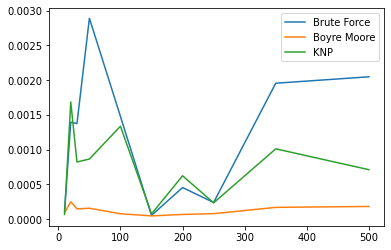

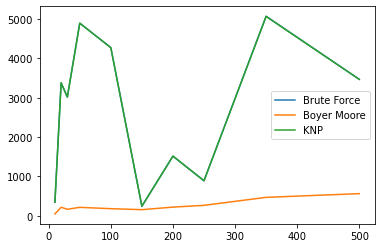

<Figure size 432x288 with 0 Axes>

In [14]:
import random
import time
import string
import matplotlib.pyplot as plt

random.seed(50)

lower_upper_alphabet = string.ascii_letters
input_char_list = [random.choice(lower_upper_alphabet) for i in range(10000)]
text = ''.join([str(elem) for elem in input_char_list])
    
def generate_pattern_sizes(Source_text):
    m=len(Source_text)
    percentages = [0.1, 0.2, 0.25, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9]
    n=[ int(x*len(Source_text)) for x in percentages]
    pattern_substring=[]
    for i in n:
        random_index= random.randint(0,m-i)
        pattern_substring.append(Source_text[random_index:random_index+i])
    return pattern_substring


def run_experiment_input1(text_string):
    final_time_brute=[]
    final_time_boyer=[]
    final_time_KMP=[]
    brute_k_comparisons=[]
    BM_k_comparison=[]
    KMP_k_comparison=[]
    pattern_substring=generate_pattern_sizes(text_string)
    for pattern in pattern_substring:
        pattern=pattern
        start_time=time.perf_counter()
        k1=v1_find_brute(text_string,pattern)
        final_time_brute.append(time.perf_counter()-start_time)
        brute_k_comparisons.append(k1)
        start_time1=time.perf_counter()
        k2=v1_find_boyer_moore(text_string,pattern)
        final_time_boyer.append(time.perf_counter()-start_time1)
        BM_k_comparison.append(k2)
        start_time2=time.perf_counter()
        k3=comp_find_kmp(text_string,pattern)
        final_time_KMP.append(time.perf_counter()-start_time2)
        KMP_k_comparison.append(k3)
    lengths = [len(x) for x in pattern_substring]
    plt.xlabel("Size of patterns - Input1",)
    plt.ylabel("Comparisons")
    plt.plot(lengths ,brute_k_comparisons, label = "Brute Force")
    plt.plot(lengths ,BM_k_comparison, label = "Boyer Moore")
    plt.plot(lengths ,KMP_k_comparison, label = "KMP ")
    plt.legend()
    plt.show()
    plt.clf()
    plt.xlabel("Size of patterns- Input1")
    plt.ylabel("Execution time")
    plt.plot(lengths ,final_time_brute, label = "Brute Force")
    plt.plot(lengths ,final_time_boyer, label = "Boyer Moore")
    plt.plot(lengths ,final_time_KMP, label = "KMP ")
    plt.legend()

english_text_experiment()

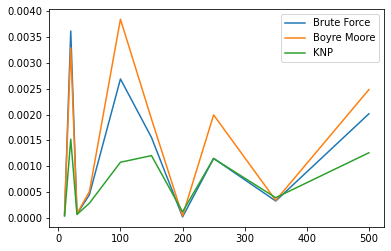

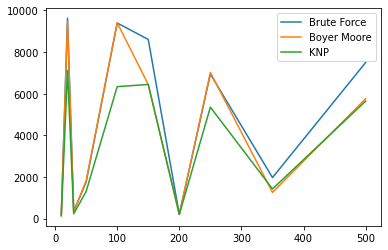

<Figure size 432x288 with 0 Axes>

In [17]:
import random
import time
import string
import matplotlib.pyplot as plt

random.seed(50)

lower_upper_alphabet = ['g', 't', 'c', 'a']
input_char_list = [random.choice(lower_upper_alphabet) for i in range(10000)]
text = ''.join([str(elem) for elem in input_char_list])
    
def generate_pattern_sizes(Source_text):
    m=len(Source_text)
    percentages = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    n=[ int(x*len(Source_text)) for x in percentages]
    pattern_substring=[]
    for i in n:
        random_index= random.randint(0,m-i)
        pattern_substring.append(Source_text[random_index:random_index+i])
    return pattern_substring


def run_experiment_input1(text_string):
    final_time_brute=[]
    final_time_boyer=[]
    final_time_KMP=[]
    brute_k_comparisons=[]
    BM_k_comparison=[]
    KMP_k_comparison=[]
    pattern_substring=generate_pattern_sizes(text_string)
    for pattern in pattern_substring:
        pattern=pattern
        start_time=time.perf_counter()
        k1=v1_find_brute(text_string,pattern)
        final_time_brute.append(time.perf_counter()-start_time)
        brute_k_comparisons.append(k1)
        start_time1=time.perf_counter()
        k2=v1_find_boyer_moore(text_string,pattern)
        final_time_boyer.append(time.perf_counter()-start_time1)
        BM_k_comparison.append(k2)
        start_time2=time.perf_counter()
        k3=comp_find_kmp(text_string,pattern)
        final_time_KMP.append(time.perf_counter()-start_time2)
        KMP_k_comparison.append(k3)
    lengths = [len(x) for x in pattern_substring]
    plt.xlabel("Size of patterns - Input1",)
    plt.ylabel("Comparisons")
    plt.plot(lengths ,brute_k_comparisons, label = "Brute Force")
    plt.plot(lengths ,BM_k_comparison, label = "Boyer Moore")
    plt.plot(lengths ,KMP_k_comparison, label = "KMP ")
    plt.legend()
    plt.show()
    plt.clf()
    plt.xlabel("Size of patterns- Input1")
    plt.ylabel("Execution time")
    plt.plot(lengths ,final_time_brute, label = "Brute Force")
    plt.plot(lengths ,final_time_boyer, label = "Boyer Moore")
    plt.plot(lengths ,final_time_KMP, label = "KMP")
    plt.legend()

english_text_experiment()

# Problem-3 Matrix-chain Multiplication

The matrix-chain multiplication problem: Given a chain of < D1, D2, . . . , Dn > of n matrices fully
parenthesize the product < D1 ·D2 · · · Dn > in a way so that the number of scalar multiplications
is minimized. Each Di has a pi−1 × pi dimension and i = 1, 2, . . . , n.
1. The Brute-Force: [10 pt.]: Implement a Python program to solve the matrix-chain multipli-
cation problem by the brute force algorithm.
2. Bottom-up Dynamic Programming [20 pt.]: Implement a Python program to solve the
matrix-chain multiplication problem using bottom-up dynamic programming approach.
3. Dynamic Programming with Memoization [Extra Credit, 10 pt.]: Implement a Python pro-
gram to solve the matrix-chain multiplication problem using dynamic programming with
memoization.


# Solution

## Approach for brute force

The brute force algorithm thakes 4 inputs: dimensions, start_index, end_index and the matrix s to keep track of where the paranthesis needs to be placed

The brute force solution is a exhaustive search based that is done recursively as follows:

cost of multiplying matrices between i and j = 0 if i==j ------------- (1)

cost of multiplying matrices between i and j = min (cost of multiplying matrices between i and k + cost of multiplying matrices between k+1 and j) for all i<=k< j if i==j ------------ (2)


This will exhaustively place paranthesis in every possible place and then calculates the cost of multiplication. Finally chooses the placement that offers the minimum number of calculations.

From (1) and (2) we can see that Brute force approach is an exponential time complexity algorithm. Hence, even for small number of matrices, the execution time grows out of proportion.


The matrix s is used to store the index at which paranthesis needs to be placed such that it offers the least multiplication cost. This matrix is used to reconstruct the solution from cost in **print_optimal_parens()** function.


## Approach for Dynamic Programming (bottom-up)

The bottom up approach of dynamic programming solves the problem by first solving smaller sub problems first and then working its way up.

In this problem the base case or the trivial case is multiplication of single matrix. The cost is 0 since there is no multiplication involved. Hence we start the solution by first tabulating the solution for trivial case as follows:

```
 # fill the trivial solution. i.e cost of multiplying single matrix is 0
    for i in range(n):
        cost[i][i] = 0
```

Then we can start looking at non-trivial sub-problems that is for length>=2. The cost matrix helps us in saving the solutions fo sub problems and serves as a look-up and helps avoid repeat solving of same sub-problems.

The rows of cost-matrix represent the starting position in the matrix multiplication string and the columns represent the length of sub-problem.

So, **cost[i][j] entry tells the minimum cost of multiplying j matrices from the position i.** 

**Intutively, when we complete the computation, the final solution - minimum cost to multiply n matrices from first position will be in the entry cost[0][n]**

Further, to print the actual placement of paranthesis, we make use of s matrix to store the index k at position i,j - which will indicate where to place the paranthesis for the sub-problem between i and j. We then use the **print_optimal_parens()** function to print the paranthesised expression.


#### Time complexity of bottom-up dynamic programming approach:

We can observe from the algorithm that the time complexity of the dynamic programming approach is O(n<sup>3</sup>), since there are 3 nested for loops that run depending on value of n - the number of matrices in multiplication string.

1) first loop goes over from length=2 to n-1

2) for each length second loop goes over starting position in multiplication string 1 to n-length

3) for each position i, we place paranthesis in every possible j-i positions.


**Conclusion: Dynamic programming might be a cubic time algorithm, but it reduces the execution time from exponential as given by brute force.**


## Approach for Dynamic programming with memoization:

Dynamic programmic with memoization is a top-down based approach that is also based on recursion similar to brute force with the following two changes:

1) Takes and additional parameter - memo - that keeps track of already solved sub-problems.

2) Adds additional base case - if the memo has the solution, then return the solution.


In the memoized implementation of Matrix chain multiplication, as indicated above, the brute force solution is modified to pass an additional **memo** parameter that saves the solution for already solved problems. When a recusive call is made, first we check whether the solution already exists in the **memo** if so, no further recursive calls are made, pre-computed solution is returned. 
If the solution does not exist in the memo, then we compute the result, **memoize it** and then return the computed result.

#### Comparisons with brute force:
For 8 matrix multiplication:

1) Brute force solves **121 sub problems**

2) Memoization solves **35 sub problems**

In [1]:
import random
import sys

dims = [10, 20, 30, 40, 30, 50, 60]
count = [0]


def matrix_chain_multiplication(dimensions):
    # first we define our cost matrix which will be of dimensions nxn, where n = number of matrices
    n = len(dimensions)
    cost = [[0 for i in range(n)] for j in range(n)]
    s = [['' for i in range(n)] for j in range(n)]

    # fill the trivial solution. i.e cost of multiplying single matrix is 0
    for i in range(n):
        cost[i][i] = 0

    # Now we calculate cost of non-trivial solutions. i.e optimal cost of multiplying >=2 matrices
    for length in range(2, n + 1):
        # we've to calculate this cost from every starting position in the multiplication string
        for i in range(1, n - length + 1):
            # from i, we multiply number of matrices given by length i.e from i to i+length
            j = i + length - 1  # if i=0, then j=2 i.e we multiply A0 and A1. we don't consider A2.
            # initialize cost[i][j] to + infinity
            cost[i][j] = sys.maxsize
            # to calculate the solution for sub problem Ai to Aj, we have to further divide to Ai..Ak and Ak..Aj for
            # all k between i and j such that i<=k<j
            for k in range(i, j):
                cur_cost = cost[i][k] + cost[k + 1][j] + dimensions[i - 1] * dimensions[k] * dimensions[j]
                if cur_cost < cost[i][j]:
                    cost[i][j] = cur_cost
                    s[i][j] = k
    print_matrix(cost)
    return cost[1][n - 1], s


def print_optimal_parens(s, i, j):
    if i == j:
        return 'A{}'.format(i)
    else:
        return "({}{})".format(print_optimal_parens(s, i, s[i][j]), print_optimal_parens(s, s[i][j] + 1, j))


def print_matrix(matrix):
    for row in matrix:
        print(row)


def brute_force_mcm(dimensions, i, j, s):
    if i == j:
        return 0
    cost = sys.maxsize
    for k in range(i, j):
        count[0] += 1
        cur_cost = brute_force_mcm(dimensions, i, k, s) + brute_force_mcm(dimensions, k + 1, j, s) + \
                   dimensions[i - 1] * \
                   dimensions[k] * dimensions[j]
        if cur_cost < cost:
            cost = cur_cost
            s[i][j] = k
    return cost


def memoization_mcm(dimensions, i, j, s, m):
    if i == j:
        m[i][j] = 0
        return m[i][j]
    elif m[i][j] < sys.maxsize:
        return m[i][j]
    for k in range(i, j):
        count[0] += 1
        cur_cost = memoization_mcm(dimensions, i, k, s, m) + memoization_mcm(dimensions, k + 1, j, s, m) + \
                   dimensions[i - 1] * dimensions[k] * dimensions[j]
        if cur_cost < m[i][j]:
            m[i][j] = cur_cost
            s[i][j] = k
    return m[i][j]


if __name__ == '__main__':
    min_cost, s = matrix_chain_multiplication(dims)
    n = len(dims) - 1
    print(min_cost, print_optimal_parens(s, 1, n))
    count = [0]
    s = [['' for i in range(n+1)] for j in range(n+1)]
    print("brute_force solution = ", brute_force_mcm(dims, 1, n, s), print_optimal_parens(s, 1, n))
    print("brute force calculated ", count, "sub problems")
    s = [['' for i in range(n+1)] for j in range(n+1)]
    m = [[sys.maxsize for i in range(n+1)] for j in range(n+1)]
    count = [0]
    print("memoization solution = ", memoization_mcm(dims, 1, n, s, m), print_optimal_parens(s, 1, n))
    print("memoization calculated ", count, "sub problems")


[0, 0, 0, 0, 0, 0, 0]
[0, 0, 6000, 18000, 30000, 45000, 75000]
[0, 0, 0, 24000, 48000, 78000, 138000]
[0, 0, 0, 0, 36000, 81000, 171000]
[0, 0, 0, 0, 0, 60000, 162000]
[0, 0, 0, 0, 0, 0, 90000]
[0, 0, 0, 0, 0, 0, 0]
75000 (((((A1A2)A3)A4)A5)A6)
brute_force solution =  75000 (((((A1A2)A3)A4)A5)A6)
brute force calculated  [121] sub problems
memoization solution =  75000 (((((A1A2)A3)A4)A5)A6)
memoization calculated  [35] sub problems


# Problem 4

In [55]:
def lcs(str1, str2):
    m = len(str1)
    n = len(str2)
    LCS = [[0 for x in range(n+1)] for x in range(m+1)]

    # Building the mtrix in bottom-up way
    for i in range(m+1):
        for j in range(n+1):
            if i == 0 or j == 0:
                LCS[i][j] = 0
            elif str1[i-1] == str2[j-1]:
                LCS[i][j] = LCS[i-1][j-1] + 1
            else:
                LCS[i][j] = max(LCS[i-1][j], LCS[i][j-1])

    index = LCS[m][n]

    result= [""] * (index+1)
    

    i = m
    j = n
    while i > 0 and j > 0:

        if str1[i-1] == str2[j-1]:
            result[index-1] = str1[i-1]
            i -= 1
            j -= 1
            index -= 1

        elif LCS[i-1][j] > LCS[i][j-1]:
            i -= 1
        else:
            j -= 1
            
    return result

In [56]:
a = "ACCGGTCGAGTGCGCGGAAGCCGGCCGAA"
b = "GTCGTTCGGAATGCCGTTGCTCTGTAAA"
word = ''.join(lcs(a, b))
print ("text1=", len(a))
print ("text2=", len(b))
print("common substring is: ", word)
print("Length of the Longest common substring is:", len(word))

text1= 29
text2= 28
common substring is:  GTCGTCGGAAGCCGGCCGAA
Length of the Longest common substring is: 20


In [58]:
a = 'TTCTACGGGGGGAGACCTTTACGAATCACACCGGTCTTCTTTGTTCTAGCCGCTCTTTTTCATCAGTTGCAGCTAGTGCATAATTGCTCACAAACGTATC''TTCTACGGGGGGAGACCTTTACGAATCACACCGGTCTTCTTTGTTCTAGCCGCTCTTTTTCATCAGTTGCAGCTAGTGCATAATTGCTCACAAACGTATC'
b = 'TCTACGGGGGGCGTCATTACGGAATCCACACAGGTCGTTATGTTCATCTGTCTCTTTTCACAGTTGCGGCTTGTGCATAATGCTCACGAACGTATC''TCTACGGGGGGCGTCATTACGGAATCCACACAGGTCGTTATGTTCATCTGTCTCTTTTCACAGTTGCGGCTTGTGCATAATGCTCACGAACGTATC'
word = ''.join(lcs(a, b))
print ("text1=", len(a))
print ("text2=", len(b))
print("common substring is: ", word)
print("Length of the Longest common substring is:", len(word))

text1= 200
text2= 192
common substring is:  TCTACGGGGGGCTTTACGAATCCACCGGTCTTTGTTCACGTCTTTTTCACAGTTGCGCTGTGCATAATGCTCACAACGTATCTCTACGGGGGGCTTTACGAATCCACCGGTCTTTGTTCACGTCTTTTTCACAGTTGCGCTGTGCATAATGCTCACAACGTATC
Length of the Longest common substring is: 164


In [59]:
a = "ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCATACTCCTGACACTATTTCTCGTCACCCAACTAAAAATATTAAATTCAAATTACCATCTACCCCCCTCACCAAAACCCATAAAAATAAAAAACTACAATAAACCCTGAGAACCAAAATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG"
b = "ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAGGCTTACCCGCCGCAGTACTAATCATTCTATTCCCCCCTCTACTGGTCCCCACTTCTAAACATCTCATCAACAACCGACTAATTACCACCCAACAATGACTAATTCAACTGACCTCAAAACAAATAATAACTATACACAGCACTAAAGGACGAACCTGATCTCTCATACTAGTATCCTTAATCATTTTTATTACCACAACCAATCTTCTTGGGCTTCTACCCCACTCATTCACACCAACCACCCAACTATCTATAAACCTAGCCATGGCTATCCCCCTATGAGCAGGCGCAGTAGTCATAGGCTTTCGCTTTAAGACTAAAAATGCCCTAGCCCACTTCTTACCGCAAGGCACACCTACACCCCTTATCCCCATACTAGTTATCATCGAAACTATTAGCCTACTCATTCAACCAATAGCCTTAGCCGTACGTCTAACCGCTAACATTACTGCAGGCCACCTACTCATGCACCTAATTGGAAGCGCCACACTAGCATTATCAACTATCAATCTACCCTATGCACTCATTATCTTCACAATTCTAATCCTACTGACTATTCTAGAGATCGCCGTCGCCTTAATCCAAGCCTACGTTTTTACACTTCTAGTGAGCCTCTACCTGCACGACAACACATAA"
word = ''.join(lcs(a, b))
print ("text1=", len(a))
print ("text2=", len(b))
print("common substring is: ", word)
print("Length of the Longest common substring is:", len(word))

text1= 207
text2= 681
common substring is:  ATGCCCCACTAAATACCGCCGTATGACCCACCATAATTACCCCCATACTCCTGACACTATTTCTCGTCACCCAACTAAAAATATTAAATTCAAATTACCATCTACCCCCCTCACCAAAACCCATAAAAATAAAAAACTACAATAAACCCTGAGAACCAAAATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG
Length of the Longest common substring is: 206


In [60]:
a = "ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGCCGGCGGCGCGGAGCTCCGGGCCCGGCTCCCCAGGCCGTGCGGGACCGTCGGGGCCGAGCGCCGCTGCCGACGTCCGCGCGCAGGTTCATAGGCGGAAGGGACTTGACTTGTCTCAGATACCCTATATTAATCTTGTGAAGCATTTAACATCTGCCTGTCCAAATGTATGTCGTATATCACGGTTTCATCACACAACCCCAGACAGTAAAACACACAGTGGTGAAAAATACACCGATCCTTTCAAACTCGGTTGGAGAGACTTGAAAGGTCTGTATGAGGACATTAGAAAGGAACTGCTTATATCAACATCAGAACTTAAGGAAATGTCTGAGTACTACTTTGATGGGAAAGGGAAAGCCTTTCGACCAATTATTGTGGCGCTAATGGCCCGAGCATGCAATATTCATCATAACAACTCCCGACATGTGCAAGCCAGCCAGCGCACCATAGCCTTAATTGCAGAAATGATCCACACTGCTAGTCTGGTTCACGATGACGTTATTGACGATGCAAGTTCTCGAAGAGGAAAACACACAGTTAATAAGATCTGGGGTGAAAAGAAGGCTGTTCTTGCTGGAGATTTAATTCTTTCTGCAGCATCTATAGCTCTGGCACGAATTGGAAATACAACTGTTATATCTATTTTAACCCAAGTTATTGAAGATTTGGTGCGTGGTGAATTTCTTCAGCTCGGGTCAAAAGAAAATGAGAATGAAAGATTTGCACACTACCTTGAGAAGACGTTCAAGAAGACCGCCAGCCTGATAGCCAACAGTTGTAAAGCAGTCTCTGTTCTAGGATGTCCCGACCCAGTGGTGCATGAGATCGCCTATCAGTACGGAAAAAATGTAGGAATAGCTTTTCAGCTTATAGATGATGTATTGGACTTCACCTCATGTTCTGACCAGATGGGCAAACCAACATCAGCTGATCTGAAGCTCGGGTTAGCCACTGGTCCTGTCCTGTTTGCCTGTCAGCAGTTCCCAGAAATGAATGCTATGATCATGCGACGGTTCAGTTTGCCGGGAGATGTAGACAGAGCTCGACAGTATGTATTACAGAGTGATGGTGTGCAACAAACAACCTACCTCGCCCAGCAGTACTGCCATGAAGCAATAAGAGAGATCAGTAAACTTCGACCATCCCCAGAAAGAGATGCCCTCATTCAGCTTTCAGAAATTGTACTCACAAGAGATAAATGA"
b = "ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGCCGGCGGCGCGGAGCTCCGGGCCCGGCTCCCCAGGCCGTGCGGGACCGTCGGGGCCGAGCGCCGCTGCCGACGTCCGCGCGCAGGTGAGGTTGGGAGGCTCGCGCCCGATACCCTATATTAATCTTGTGAAGCATTTAACATCTGCCTGTCCAAATGTATGTCGTATATCACGGTTTCATCACACAACCCCAGACAGTAAAACACACAGTGGTGAAAAATACACCGATCCTTTCAAACTCGGTTGGAGAGACTTGAAAGGTCTGTATGAGGACATTAGAAAGGAACTGCTTATATCAACATCAGAACTTAAGGAAATGTCTGAGTACTACTTTGATGGGAAAGGGAAAGCCTTTCGACCAATTATTGTGGCGCTAATGGCCCGAGCATGCAATATTCATCATAACAACTCCCGACATGTGCAAGCCAGCCAGCGCACCATAGCCTTAATTGCAGAAATGATCCACACTGCTAGTCTGGTTCACGATGACGTTATTGACGATGCAAGTTCTCGAAGAGGAAAACACACAGTTAATAAGATCTGGGGTGAAAAGAAGGCTGTTCTTGCTGGAGATTTAATTCTTTCTGCAGCATCTATAGCTCTGGCACGAATTGGAAATACAACTGTTATATCTATTTTAACCCAAGTTATTGAAGATTTGGTGCGTGGTGAATTTCTTCAGCTCGGGTCAAAAGAAAATGAGAATGAAAGATTTGCACACTACCTTGAGAAGACGTTCAAGAAGACCGCCAGCCTGATAGCCAACAGTTGTAAAGCAGTCTCTGTTCTAGGATGTCCCGACCCAGTGGTGCATGAGATCGCCTATCAGTACGGAAAAAATGTAGGAATAGCTTTTCAGCTTATAGATGATGTATTGGACTTCACCTCATGTTCTGACCAGATGGGCAAACCAACATCAGCTGATCTGAAGCTCGGGTTAGCCACTGGTCCTGTCCTGTTTGCCTGTCAGCAGTTCCCAGAAATGAATGCTATGATCATGCGACGGTTCAGTTTGCCGGGAGATGTAGACAGAGCTCGACAGTATGTATTACAGAGTGATGGTGTGCAACAAACAACCTACCTCGCCCAGCAGTACTGCCATGAAGCAATAAGAGAGATCAGTAAACTTCGACCATCCCCAGAAAGAGATGCCCTCATTCAGCTTTCAGAAATTGTACTCACAAGAGATAAATGA"
word = ''.join(lcs(a, b))
print ("text1=", len(a))
print ("text2=", len(b))
print("common substring is: ", word)
print("Length of the Longest common substring is:", len(word))

text1= 1248
text2= 1239
common substring is:  ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGCCGGCGGCGCGGAGCTCCGGGCCCGGCTCCCCAGGCCGTGCGGGACCGTCGGGGCCGAGCGCCGCTGCCGACGTCCGCGCGCAGGTAGGGGGGGCTGCGCCGATACCCTATATTAATCTTGTGAAGCATTTAACATCTGCCTGTCCAAATGTATGTCGTATATCACGGTTTCATCACACAACCCCAGACAGTAAAACACACAGTGGTGAAAAATACACCGATCCTTTCAAACTCGGTTGGAGAGACTTGAAAGGTCTGTATGAGGACATTAGAAAGGAACTGCTTATATCAACATCAGAACTTAAGGAAATGTCTGAGTACTACTTTGATGGGAAAGGGAAAGCCTTTCGACCAATTATTGTGGCGCTAATGGCCCGAGCATGCAATATTCATCATAACAACTCCCGACATGTGCAAGCCAGCCAGCGCACCATAGCCTTAATTGCAGAAATGATCCACACTGCTAGTCTGGTTCACGATGACGTTATTGACGATGCAAGTTCTCGAAGAGGAAAACACACAGTTAATAAGATCTGGGGTGAAAAGAAGGCTGTTCTTGCTGGAGATTTAATTCTTTCTGCAGCATCTATAGCTCTGGCACGAATTGGAAATACAACTGTTATATCTATTTTAACCCAAGTTATTGAAGATTTGGTGCGTGGTGAATTTCTTCAGCTCGGGTCAAAAGAAAATGAGAATGAAAGATTTGCACACTACCTTGAGAAGACGTTCAAGAAGACCGCCAGCCTGATAGCCAACAGTTGTAAAGCAGTCTCTGTTCTAGGATGTCCCGACCCAGTGGTGCATGAGATCGCCTATCAGTACGGAAAAAATGTAGGAATAGCTTTTCAGCTTATAGATGATGTATTGGACTTCACCTCATGTTCTGACCAGATGGGCAAACCAACA